One-Max Problem

My solution uses some function developed by the professor Giovanni Squillero in [his solution](https://github.com/squillero/computational-intelligence/blob/master/2022-23/one-max.ipynb). I will mark those section with `Professor Squillero's`.

> Copyright **`(c)`** 2022 Giovanni Squillero `<squillero@polito.it>`  
> [`https://github.com/squillero/computational-intelligence`](https://> github.com/squillero/computational-intelligence)  
> Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [63]:
import logging
from collections import namedtuple
import random
from matplotlib import pyplot as plt

In [64]:
# Same parameters of the professor's solution
PROBLEM_SIZE = 500
POPULATION_SIZE = 5
OFFSPRING_SIZE = 3
NUM_GENERATIONS = 10000

MUTATION_RATE = 0.3

In [65]:
# Professor Squillero's

Individual = namedtuple("Individual", ["genome", "fitness"])


def onemax(genome):
    return sum(genome)


def tournament(population, tournament_size=2):
    return max(random.choices(population, k=tournament_size), key=lambda i: i.fitness)


def cross_over(g1, g2):
    cut = random.randint(0, PROBLEM_SIZE)
    return g1[:cut] + g2[cut:]


def mutation(g):
    point = random.randint(0, PROBLEM_SIZE - 1)
    return g[:point] + (1 - g[point],) + g[point + 1 :]


def initial_population():
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(PROBLEM_SIZE)]) for _ in range(POPULATION_SIZE)]:
        population.append(Individual(genome, onemax(genome)))

    logging.info(f"Initial population:\n\tpop_size={len(population)};\n\tmax={max(population, key=lambda i: i.fitness)[1]}\n")

    return population


def performance_evaluation(fitness_log, title=None):
    off_line = [max(f[1] for f in fitness_log if f[0] == x) / (x + 1) for x in range(NUM_GENERATIONS)]
    on_line = [max(f[1] for f in fitness_log if f[0] <= x) / (x + 1) for x in range(NUM_GENERATIONS)]
    gen_best = [max(f[1] for f in fitness_log if f[0] == x) for x in range(NUM_GENERATIONS)]

    plt.figure(figsize=(15, 6))
    if title:
        plt.title(title)
    plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".", label='fitness_log')
    plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)], label='gen_best')
    plt.plot([x for x, _ in enumerate(on_line)], [y for _, y in enumerate(on_line)], label='on_line')
    plt.plot([x for x, _ in enumerate(off_line)], [y for _, y in enumerate(off_line)], label='off_line')

### Evolution (by professor Squillero)

In [66]:
def GA_professor(population):
  fitness_log = [(0, i.fitness) for i in population]

  for g in range(NUM_GENERATIONS):
      offspring = list()
      for i in range(OFFSPRING_SIZE):
          if random.random() < 0.3:
              p = tournament(population)
              o = mutation(p.genome)
          else:
              p1 = tournament(population)
              p2 = tournament(population)
              o = cross_over(p1.genome, p2.genome)
          f = onemax(o)
          fitness_log.append((g + 1, f))
          offspring.append(Individual(o, f))
      population += offspring
      population = sorted(population, key=lambda i: i.fitness, reverse=True)[:POPULATION_SIZE]

  return population, fitness_log


## Genetic Algorithm

In [67]:
logging.getLogger().setLevel(logging.INFO)

In [68]:
def compare_performance(fitness_logs, title=None):
    plt.figure(figsize=(15, 6))
    plt.title("Compare performances")
    plt.ylabel("Best individual")
    plt.xlabel("Generation")
    for f_l, name in fitness_logs:
        gen_best = [max(f[1] for f in f_l if f[0] == x) for x in range(NUM_GENERATIONS)]
        plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)], label=name)
    plt.legend()

### Evolution

In [69]:
def GA_strategy2(population):
  """Genetic Algorithm - Strategy 2"""

  fitness_log = [(0, i.fitness) for i in population] # Professor Squillero's - needed to use performance_evaluation()

  for generation in range(NUM_GENERATIONS):
    offspring = list()
    for i in range(POPULATION_SIZE):
      # Selection
      parent1 = tournament(population)
      parent2 = tournament(population)
      child_genome = cross_over(parent1.genome, parent2.genome)

      # Mutation
      if random.random() < MUTATION_RATE:
          child_genome = mutation(child_genome)
      
      child_fitness = onemax(child_genome)
      fitness_log.append((generation + 1, child_fitness))
      offspring.append(Individual(child_genome, child_fitness))

    population = offspring  # Discard the old population

  return population, fitness_log

In [70]:
def GA_mixed_strategy(population):
  """Genetic Algorithm - We have a probability p of recombination vs a probability 1-p of mutation"""
  
  fitness_log = [(0, i.fitness) for i in population] # Professor Squillero's - needed to use performance_evaluation()

  for generation in range(NUM_GENERATIONS):
    offspring = list()
    p_mutation = generation / NUM_GENERATIONS  # Mutation becomes more probable with generation growing

    for i in range(POPULATION_SIZE):
      if random.random() < p_mutation:    # Mutation
        x = tournament(population)
        new_genome = mutation(x.genome) 
      else:                               # Crossover
        parent1 = tournament(population)
        parent2 = tournament(population)
        new_genome = cross_over(parent1.genome, parent2.genome)
      
      fitness = onemax(new_genome)
      fitness_log.append((generation + 1, fitness))
      offspring.append(Individual(new_genome, fitness))

    population = offspring  # Discard the old population

  return population, fitness_log

In [71]:
def GA_professor_improved(population):
  fitness_log = [(0, i.fitness) for i in population]

  for g in range(NUM_GENERATIONS):
      p_mutation = g / NUM_GENERATIONS  # Mutation becomes more probable with generation growing
      offspring = list()
      for i in range(OFFSPRING_SIZE):
          if random.random() < p_mutation:
              p = tournament(population)
              o = mutation(p.genome)
          else:
              p1 = tournament(population)
              p2 = tournament(population)
              o = cross_over(p1.genome, p2.genome)
          f = onemax(o)
          fitness_log.append((g + 1, f))
          offspring.append(Individual(o, f))
      population += offspring
      population = sorted(population, key=lambda i: i.fitness, reverse=True)[:POPULATION_SIZE]

  return population, fitness_log

## Main

INFO:root:Initial population:
	pop_size=5;
	max=255

INFO:root:Professor's 
	solution: pop_size=5;
	max=500
INFO:root:GA strategy 2:
	pop_size=5;
	max=482
INFO:root:GA mixed strategy:
	pop_size=5;
	max=385
INFO:root:GA improved:
	pop_size=5;
	max=500


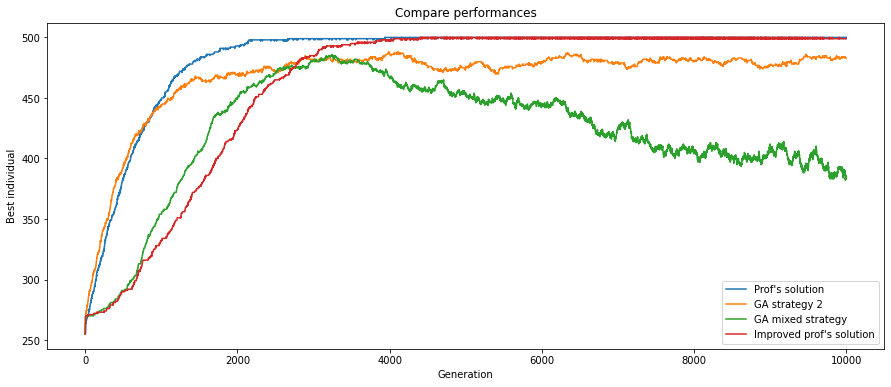

In [72]:
population = initial_population()

population_prof, fitness_log_prof = GA_professor(population)
population_s2, fitness_log_s2 = GA_strategy2(population)
population_mixed, fitness_log_mixed = GA_mixed_strategy(population)
population_impr, fitness_log_impr = GA_professor_improved(population)

logging.info(f"Professor's \n\tsolution: pop_size={len(population_prof)};\n\tmax={max(population_prof, key=lambda i: i.fitness)[1]}")
logging.info(f"GA strategy 2:\n\tpop_size={len(population_s2)};\n\tmax={max(population_s2, key=lambda i: i.fitness)[1]}")
logging.info(f"GA mixed strategy:\n\tpop_size={len(population_mixed)};\n\tmax={max(population_mixed, key=lambda i: i.fitness)[1]}")
logging.info(f"GA improved:\n\tpop_size={len(population_impr)};\n\tmax={max(population_impr, key=lambda i: i.fitness)[1]}")

# performance_evaluation(fitness_log_prof, title="Professor's solution")
# performance_evaluation(fitness_log_s2, title="GA strategy 2")
# performance_evaluation(fitness_log_mixed, title="GA mixed strategy")
# performance_evaluation(fitness_log_impr, title="GA prof's solution improved")

fitness_logs = list()
fitness_logs.append((fitness_log_prof, "Prof's solution"))
fitness_logs.append((fitness_log_s2, "GA strategy 2"))
fitness_logs.append((fitness_log_mixed, "GA mixed strategy"))
fitness_logs.append((fitness_log_impr, "Improved prof's solution"))
compare_performance(fitness_logs)
